# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

C:\Users\supreeth\Anaconda1\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


## 1.1 Reading Data

In [2]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [3]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [4]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

## 1.2 preprocessing of `project_subject_categories`

In [5]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [6]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 Text preprocessing

In [7]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [8]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   

               clean_categories           clean_subcategories  \
0             Literacy_Language                  ESL Literacy   
1  History_Civics Health_Sports  Civics_Government TeamSports   

                                               essay  
0  My students are English learners that are work...  
1  Our students arrive to our school eager to lea...

In [9]:
#### 1.4.2.3 Using Pretrained Models: TFIDF weighted W2V

In [10]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)
print(project_data['essay'].values[99999])
print("="*50)

My students are English learners that are working on English as their second or third languages. We are a melting pot of refugees, immigrants, and native-born Americans bringing the gift of language to our school. \r\n\r\n We have over 24 languages represented in our English Learner program with students at every level of mastery.  We also have over 40 countries represented with the families within our school.  Each student brings a wealth of knowledge and experiences to us that open our eyes to new cultures, beliefs, and respect.\"The limits of your language are the limits of your world.\"-Ludwig Wittgenstein  Our English learner's have a strong support system at home that begs for more resources.  Many times our parents are learning to read and speak English along side of their children.  Sometimes this creates barriers for parents to be able to help their child learn phonetics, letter recognition, and other reading skills.\r\n\r\nBy providing these dvd's and players, students are ab

The mediocre teacher tells. The good teacher explains. The superior teacher demonstrates. The great teacher inspires. -William A. Ward\r\n\r\nMy school has 803 students which is makeup is 97.6% African-American, making up the largest segment of the student body. A typical school in Dallas is made up of 23.2% African-American students. Most of the students are on free or reduced lunch. We aren't receiving doctors, lawyers, or engineers children from rich backgrounds or neighborhoods. As an educator I am inspiring minds of young children and we focus not only on academics but one smart, effective, efficient, and disciplined students with good character.In our classroom we can utilize the Bluetooth for swift transitions during class. I use a speaker which doesn't amplify the sound enough to receive the message. Due to the volume of my speaker my students can't hear videos or books clearly and it isn't making the lessons as meaningful. But with the bluetooth speaker my students will be abl

In [11]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [12]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [13]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent=''
    sentance=sentance.lower()
    sentance = ' '.join(e for e in sentance.split() if e not in stopwords)
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    preprocessed_essays.append(sent.lower().strip())

100%|█████████████████████████████████████████████████████████████████████████| 109248/109248 [02:24<00:00, 758.25it/s]


In [14]:
# after preprocesing
preprocessed_essays[20000]

'kindergarten students varied disabilities ranging speech language delays cognitive delays gross fine motor delays autism eager beavers always strive work hardest working past limitations the materials ones seek students teach title school students receive free reduced price lunch despite disabilities limitations students love coming school come eager learn explore have ever felt like ants pants needed groove move meeting kids feel time want able move learn say wobble chairs answer love develop core enhances gross motor turn fine motor skills they also want learn games kids want sit worksheets want learn count jumping playing physical engagement key success number toss color shape mats make happen students forget work fun 6 year old deserves nannan'

In [15]:
preprocessed_essays[20000]

'kindergarten students varied disabilities ranging speech language delays cognitive delays gross fine motor delays autism eager beavers always strive work hardest working past limitations the materials ones seek students teach title school students receive free reduced price lunch despite disabilities limitations students love coming school come eager learn explore have ever felt like ants pants needed groove move meeting kids feel time want able move learn say wobble chairs answer love develop core enhances gross motor turn fine motor skills they also want learn games kids want sit worksheets want learn count jumping playing physical engagement key success number toss color shape mats make happen students forget work fun 6 year old deserves nannan'

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [16]:
# similarly you can preprocess the titles also
preprocessed_titles = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_title'].values):
    sent=''
    sentance=sentance.lower()
    sentance = ' '.join(e for e in sentance.split() if e not in stopwords)
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    preprocessed_titles.append(sent.lower().strip())

100%|███████████████████████████████████████████████████████████████████████| 109248/109248 [00:07<00:00, 15013.82it/s]


## 1.5 Preparing data for models

In [17]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### 1.5.1 Vectorizing Categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

In [18]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [19]:
project_data['essay']=preprocessed_essays
project_data['project_title']=preprocessed_titles


# Assignment 8: DT

<ol>
    <li><strong>Apply Decision Tree Classifier(DecisionTreeClassifier) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical, numerical features + project_title(AVG W2V)+  preprocessed_eassay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        </ul>
    </li>
    <br>
    <li><strong>Hyper paramter tuning (best `depth` in range [1, 5, 10, 50, 100, 500, 100], and the best `min_samples_split` in range [5, 10, 100, 500])</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation or simple cross validation data</li>
    <li>Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning</li> 
        </ul>
    </li>
    <br>
    <li><strong>Graphviz</strong>
        <ul>
    <li>Visualize your decision tree with Graphviz. It helps you to understand how a decision is being made, given a new vector.</li>
    <li>Since feature names are not obtained from word2vec related models, visualize only BOW & TFIDF decision trees using Graphviz</li>
    <li>Make sure to print the words in each node of the decision tree instead of printing its index.</li>
    <li>Just for visualization purpose, limit max_depth to 2 or 3 and either embed the generated images of graphviz in your notebook, or directly upload them as .png files.</li>                
        </ul>
    </li>
    <br>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='train_cv_auc.JPG' width=300px></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='confusion_matrix.png' width=300px></li>
    <li>Once after you plot the confusion matrix with the test data, get all the `false positive data points`
        <ul>
            <li> Plot the WordCloud <a href='https://www.geeksforgeeks.org/generating-word-cloud-python/' with the words of eassy text of these `false positive data points`>WordCloud</a></li>
            <li> Plot the box plot with the `price` of these `false positive data points`</li>
            <li> Plot the pdf with the `teacher_number_of_previously_posted_projects` of these `false positive data points`</li>
        </ul>
        </ul>
    </li>
    <br>
    <li><strong>[Task-2]</strong>
        <ul>
    <li> Select 5k best features from features of <font color='red'>Set 2</font> using<a href='https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html'>`feature_importances_`</a>, discard all the other remaining features and then apply any of the model of you choice i.e. (Dession tree, Logistic Regression, Linear SVM), you need to do hyperparameter tuning corresponding to the model you selected and procedure in step 2 and step 3</li>
        </ul>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h1>2. Decision Tree </h1>

<h2>2.1 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [21]:
df=project_data.sample(frac=0.5)
y=df['project_is_approved'].values
df.drop(['project_is_approved'],axis=1,inplace=True)
X=df

#project_data.drop(['project_is_approved'], axis=1, inplace=True)
#project_data.head(1)

#The following are (X,y) of train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, stratify=y_train)
print(len(X_train))
print(len(X_cv))
print(len(X_test))

<h2>2.2 Make Data Model Ready: encoding numerical, categorical features</h2>

In [21]:
##We are vectorizing the categorical features using count vectorizer
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
vectorizer = CountVectorizer()
vectorizer.fit(X_train['school_state'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_state_ohe = vectorizer.transform(X_train['school_state'].values)
X_cv_state_ohe = vectorizer.transform(X_cv['school_state'].values)
X_test_state_ohe = vectorizer.transform(X_test['school_state'].values)
fn_ss=vectorizer.get_feature_names()
print("After vectorizations")
print(X_train_state_ohe.shape, y_train.shape)
print(X_cv_state_ohe.shape, y_cv.shape)
print(X_test_state_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(24520, 51) (24520,)
(12078, 51) (12078,)
(18026, 51) (18026,)
['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']


In [22]:
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
vectorizer = CountVectorizer()
vectorizer.fit(X_train['teacher_prefix'].values.astype(str)) # fit has to happen only on train data
fn_tp=vectorizer.get_feature_names()
# we use the fitted CountVectorizer to convert the text to vector
X_train_teacher_ohe = vectorizer.transform(X_train['teacher_prefix'].values.astype(str))
X_cv_teacher_ohe = vectorizer.transform(X_cv['teacher_prefix'].values.astype(str))
X_test_teacher_ohe = vectorizer.transform(X_test['teacher_prefix'].values.astype(str))

print("After vectorizations")
print(X_train_teacher_ohe.shape, y_train.shape)
print(X_cv_teacher_ohe.shape, y_cv.shape)
print(X_test_teacher_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(24520, 5) (24520,)
(12078, 5) (12078,)
(18026, 5) (18026,)
['dr', 'mr', 'mrs', 'ms', 'teacher']


In [23]:
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
vectorizer=CountVectorizer(token_pattern='\w+-\d',lowercase=False, binary=True)
vectorizer.fit(X_train['project_grade_category'].values)
X_train_project_gradec=vectorizer.transform(X_train['project_grade_category'].values)
X_cv_project_gradec=vectorizer.transform(X_cv['project_grade_category'].values)
X_test_project_gradec=vectorizer.transform(X_test['project_grade_category'].values)
fn_pgc=vectorizer.get_feature_names()
print("After vectorizations")
print(X_train_project_gradec.shape, y_train.shape)
print(X_cv_project_gradec.shape, y_cv.shape)
print(X_test_project_gradec.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(24520, 4) (24520,)
(12078, 4) (12078,)
(18026, 4) (18026,)
['3-5', '6-8', '9-1', 'PreK-2']


In [24]:
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(X_train['clean_categories'].values)
X_train_clean_cat=vectorizer.transform(X_train['clean_categories'].values)
X_cv_clean_cat=vectorizer.transform(X_cv['clean_categories'].values)
X_test_clean_cat=vectorizer.transform(X_test['clean_categories'].values)
fn_cc=vectorizer.get_feature_names()
print("After vectorizations")
print(X_train_clean_cat.shape, y_train.shape)
print(X_cv_clean_cat.shape, y_cv.shape)
print(X_test_clean_cat.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(24520, 9) (24520,)
(12078, 9) (12078,)
(18026, 9) (18026,)
['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']


In [25]:
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(X_train['clean_subcategories'].values)
X_train_clean_subcat=vectorizer.transform(X_train['clean_subcategories'].values)
X_cv_clean_subcat=vectorizer.transform(X_cv['clean_subcategories'].values)
X_test_clean_subcat=vectorizer.transform(X_test['clean_subcategories'].values)
fn_csc=vectorizer.get_feature_names()
print("After vectorizations")
print(X_train_clean_subcat.shape, y_train.shape)
print(X_cv_clean_subcat.shape, y_cv.shape)
print(X_test_clean_subcat.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(24520, 30) (24520,)
(12078, 30) (12078,)
(18026, 30) (18026,)
['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'Civics_Government', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'Health_LifeScience', 'EarlyDevelopment', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']


In [26]:
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['price'].values.reshape(-1,1))

X_train_price_norm = normalizer.transform(X_train['price'].values.reshape(-1,1))
X_cv_price_norm = normalizer.transform(X_cv['price'].values.reshape(-1,1))
X_test_price_norm = normalizer.transform(X_test['price'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_price_norm.shape, y_train.shape)
print(X_cv_price_norm.shape, y_cv.shape)
print(X_test_price_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(24520, 1) (24520,)
(12078, 1) (12078,)
(18026, 1) (18026,)


In [28]:
vectorizer=CountVectorizer(min_df=10,ngram_range=(1,2),max_features=5000)
vectorizer.fit(X_train['essay'].values)
bow_train_essay=vectorizer.transform(X_train['essay'].values)
bow_test_essay=vectorizer.transform(X_test['essay'].values)
bow_cv_essay=vectorizer.transform(X_cv['essay'].values)
feat_bow_ess=vectorizer.get_feature_names()

In [29]:
vectorizer=CountVectorizer(min_df=10,ngram_range=(1,2),max_features=5000)
vectorizer.fit(X_train['project_title'].values)
bow_train_pt=vectorizer.transform(X_train['project_title'].values)
bow_test_pt=vectorizer.transform(X_test['project_title'].values)
bow_cv_pt=vectorizer.transform(X_cv['project_title'].values)
feat_bow_tit=vectorizer.get_feature_names()

In [30]:
from scipy.sparse import hstack
X_tr = hstack((bow_train_essay,bow_train_pt,X_train_state_ohe, X_train_teacher_ohe, X_train_project_gradec,X_train_clean_cat,X_train_clean_subcat, X_train_price_norm)).tocsr()
X_cv = hstack((bow_cv_essay,bow_cv_pt,X_cv_state_ohe, X_cv_teacher_ohe, X_cv_project_gradec,X_cv_clean_cat,X_cv_clean_subcat,X_cv_price_norm)).tocsr()
X_te = hstack((bow_test_essay,bow_test_pt,X_test_state_ohe, X_test_teacher_ohe, X_test_project_gradec,X_test_clean_cat,X_test_clean_subcat,X_test_price_norm)).tocsr()

print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(24520, 6927) (24520,)
(12078, 6927) (12078,)
(18026, 6927) (18026,)


In [37]:
l=[1,5,10,50,100,500,100]
mss=[5,10,100,500]

In [32]:
t=np.bincount(y_train)
print(t)

[ 3722 20798]


In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(class_weight='balanced')
param={'max_depth':l,'min_samples_split':mss}
clf = GridSearchCV(dt, param, cv=3, scoring='roc_auc',n_jobs=2)
clf.fit(X_tr, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

In [34]:
print(clf.best_estimator_)
print(clf.score(X_te,y_test))

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=10, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=500,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
0.6272491217552275


In [35]:
dt=DecisionTreeClassifier(min_samples_split=500,class_weight='balanced')
param={'max_depth':l}
clf = GridSearchCV(dt, param, cv=3, scoring='roc_auc',n_jobs=2)
clf.fit(X_tr, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

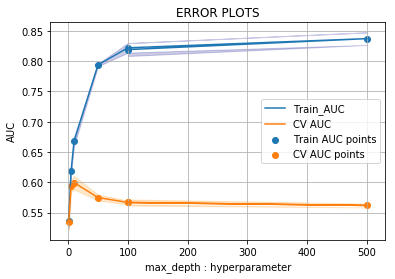

In [36]:
plt.plot(param['max_depth'],train_auc,label='Train_AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(param['max_depth'],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(param['max_depth'], cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(param['max_depth'],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(param['max_depth'], train_auc, label='Train AUC points')
plt.scatter(param['max_depth'], cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("max_depth : hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve,auc

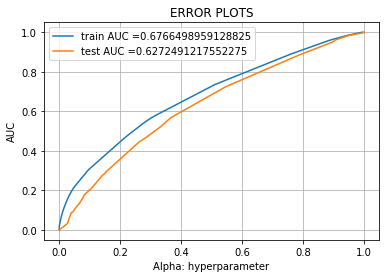

In [37]:
from sklearn.metrics import roc_curve,auc
dt=DecisionTreeClassifier(max_depth=10,min_samples_split=500,class_weight='balanced')
dt.fit(X_tr,y_train)
y_train_pred=dt.predict_proba(X_tr)[:,1]
y_test_pred=dt.predict_proba(X_te)[:,1]
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("Alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [34]:
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(tpr*(1-fpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

the maximum value of tpr*(1-fpr) 0.395773960202328 for threshold 0.457


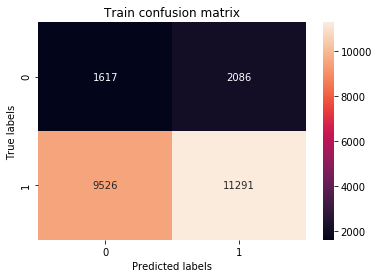

In [76]:
from sklearn.metrics import confusion_matrix
#https://gist.github.com/shaypal5/94c53d765083101efc0240d776a23823#file-confusion_matrix_pretty_print-py-L6
cm_tr=confusion_matrix(y_train,predict(y_train_pred,tr_thresholds, train_fpr, train_tpr))
ax=plt.subplot()
sns.heatmap(cm_tr,annot=True,ax=ax,fmt='g')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Train confusion matrix')
plt.show()

the maximum value of tpr*(1-fpr) 0.3430571311664563 for threshold 0.507


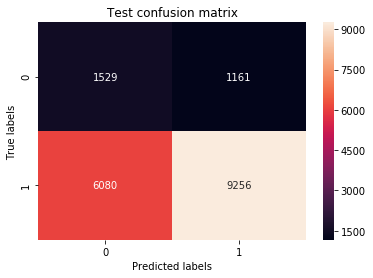

In [139]:
cm_te=confusion_matrix(y_test,predict(y_test_pred, tr_thresholds, test_fpr, test_tpr))
ax=plt.subplot()
sns.heatmap(cm_te,annot=True,ax=ax,fmt='g')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Test confusion matrix')
plt.show()

In [39]:
from itertools import chain
bow_names=list(chain(feat_bow_ess,feat_bow_tit,fn_ss,fn_tp,fn_pgc,fn_cc,fn_csc,["price"]))

In [44]:
import graphviz 
from sklearn import tree
clf=tree.DecisionTreeClassifier(max_depth=10,min_samples_split=500,class_weight='balanced')
clf=clf.fit(X_tr,y_train)


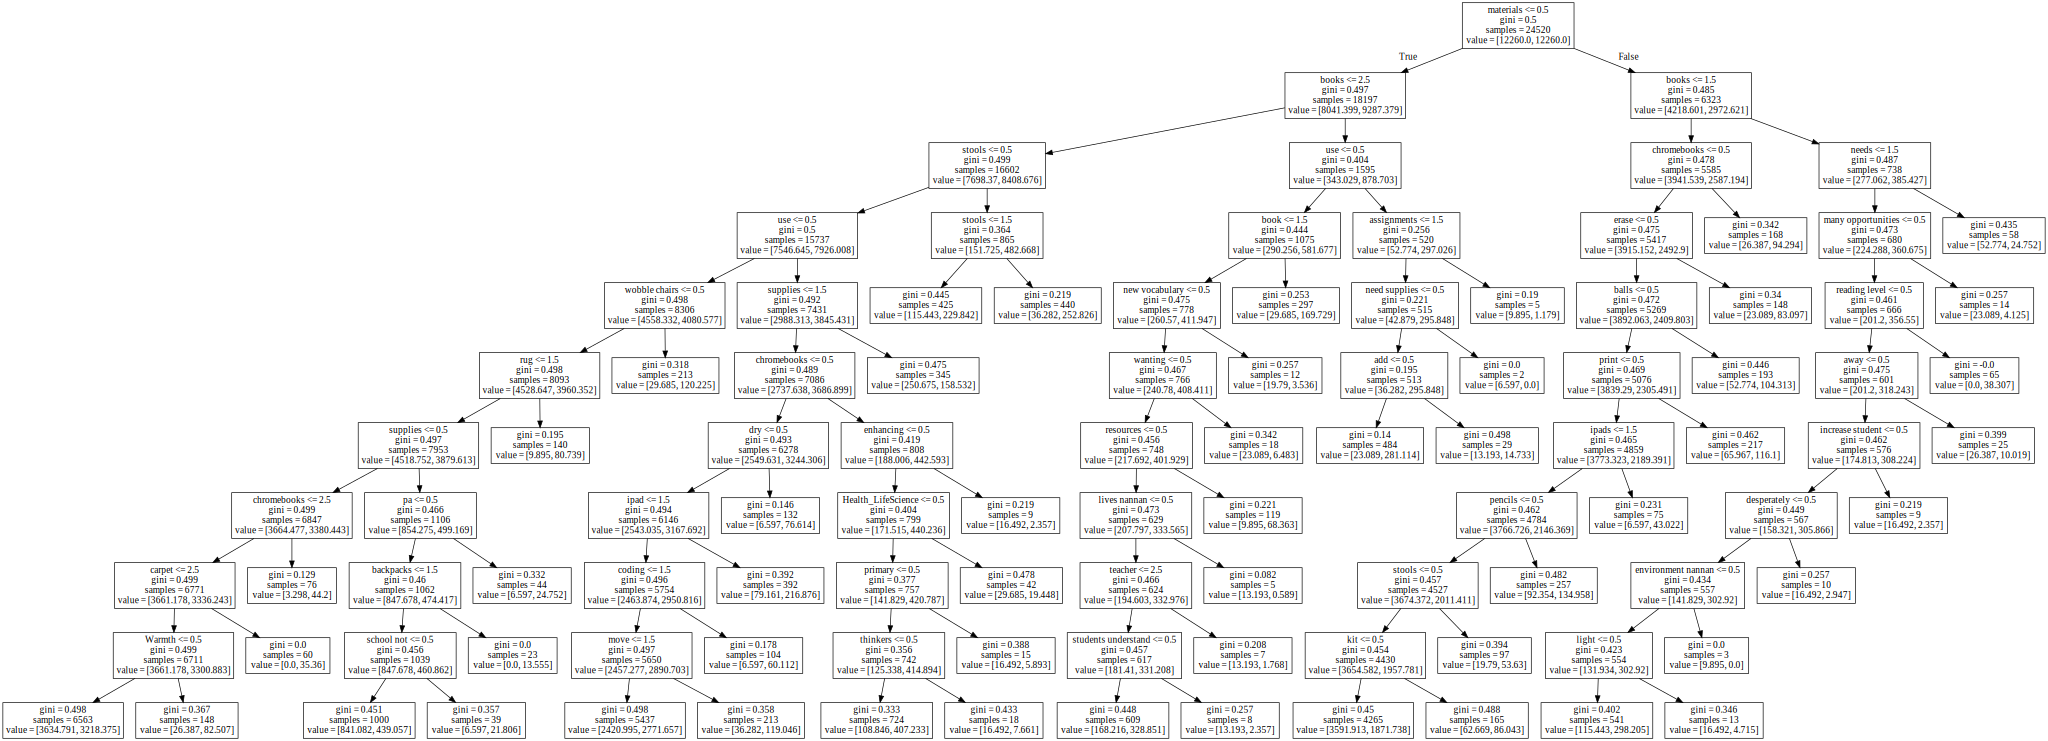

In [45]:
s=tree.export_graphviz(clf,feature_names=bow_names)
graph=graphviz.Source(s)
graph.render("X_train")
graph

In [40]:
t = tr_thresholds[np.argmax(test_tpr*(1-test_fpr))]

In [41]:
#y_test,predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)
fpd=[]
for i in range(X_te.shape[0]):
    if y_test[i]==0 and y_test_pred[i]>=t:
        fpd.append(i)
     
        

In [42]:
X_trw=X_test
X_trw['index']=[x for x in range(len(X_test))]
X_trw=X_trw.set_index('index')
fpdw=pd.DataFrame([X_trw.iloc[x] for x in fpd])
fpdw.to_csv('fp.csv')
df=pd.read_csv(r"fp.csv")
type(df)

pandas.core.frame.DataFrame

In [43]:
#https://www.datacamp.com/community/tutorials/wordcloud-python
text = " ".join(review for review in df.essay)

In [45]:
from wordcloud import WordCloud, STOPWORDS 

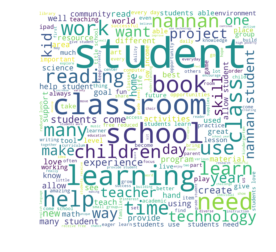

In [47]:
#https://www.datacamp.com/community/tutorials/wordcloud-python
stopwords = set(STOPWORDS)
stopwords.update(project_data.columns)
# Generate a word cloud image
wordcloud = WordCloud(width=1500,height=1500,stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

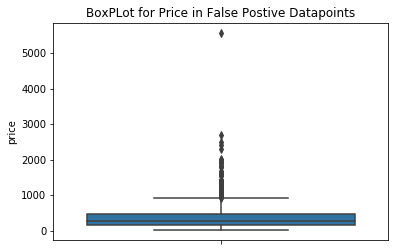

In [287]:
plt.title("BoxPLot for Price in False Postive Datapoints")
sns.boxplot(y='price', data=df)
plt.show()

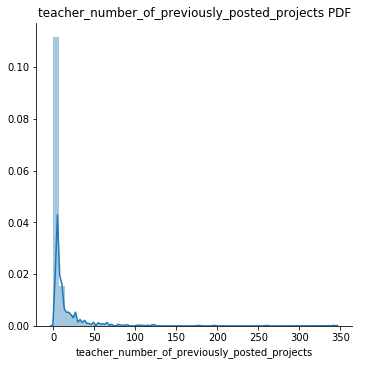

In [289]:
sns.FacetGrid(df, height=5) \
   .map(sns.distplot, "teacher_number_of_previously_posted_projects") \
   .add_legend();
plt.title("teacher_number_of_previously_posted_projects PDF")
plt.show();

# SET-2

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10,ngram_range=(1,2),max_features=5000)
vectorizer.fit(X_train['essay'].values)
train_text_tfidf=vectorizer.transform(X_train['essay'].values)
cv_text_tfidf=vectorizer.transform(X_cv['essay'].values)
test_text_tfidf=vectorizer.transform(X_test['essay'].values)
feat_tfidf_ess=vectorizer.get_feature_names()

In [28]:
vectorizer = TfidfVectorizer(min_df=10,ngram_range=(1,2),max_features=5000)
vectorizer.fit(X_train['project_title'].values)
train_title_tfidf=vectorizer.transform(X_train['project_title'].values)
cv_title_tfidf=vectorizer.transform(X_cv['project_title'].values)
test_title_tfidf=vectorizer.transform(X_test['project_title'].values)
feat_tfidf_tit=vectorizer.get_feature_names()

In [32]:
X_tr2= hstack((train_text_tfidf,train_title_tfidf,X_train_state_ohe, X_train_teacher_ohe, X_train_project_gradec,X_train_clean_cat,X_train_clean_subcat, X_train_price_norm)).tocsr()
X_cv2= hstack((cv_text_tfidf,cv_title_tfidf,X_cv_state_ohe, X_cv_teacher_ohe, X_cv_project_gradec,X_cv_clean_cat,X_cv_clean_subcat,X_cv_price_norm)).tocsr()
X_te2= hstack((test_text_tfidf,test_title_tfidf,X_test_state_ohe, X_test_teacher_ohe, X_test_project_gradec,X_test_clean_cat,X_test_clean_subcat,X_test_price_norm)).tocsr()

print("Final Data matrix")
print(X_tr2.shape, y_train.shape)
print(X_cv2.shape, y_cv.shape)
print(X_te2.shape, y_test.shape)
print("="*100)

Final Data matrix
(24520, 6909) (24520,)
(12078, 6909) (12078,)
(18026, 6909) (18026,)


In [38]:
dt2=DecisionTreeClassifier(class_weight='balanced')
param={'max_depth':l,'min_samples_split':mss}
clf2 = GridSearchCV(dt2,param, cv=3, scoring='roc_auc',n_jobs=2)
clf2.fit(X_tr2, y_train)

train_auc2= clf2.cv_results_['mean_train_score']
train_auc_std2= clf2.cv_results_['std_train_score']
cv_auc2 = clf2.cv_results_['mean_test_score'] 
cv_auc_std2= clf2.cv_results_['std_test_score']

In [73]:
dt2=DecisionTreeClassifier(min_samples_split=500,class_weight='balanced')
param={'max_depth':l}
clf2 = GridSearchCV(dt2, param, cv=3, scoring='roc_auc',n_jobs=2)
clf2.fit(X_tr2, y_train)

train_auc2= clf2.cv_results_['mean_train_score']
train_auc_std2= clf2.cv_results_['std_train_score']
cv_auc2 = clf2.cv_results_['mean_test_score'] 
cv_auc_std2= clf2.cv_results_['std_test_score']

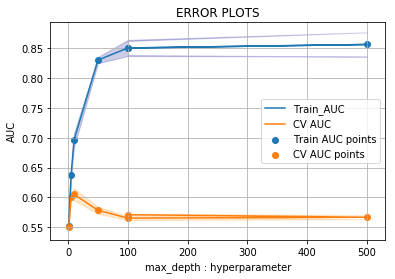

In [74]:
plt.plot(param['max_depth'],train_auc2,label='Train_AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(param['max_depth'],train_auc2 - train_auc_std2,train_auc2 + train_auc_std2,alpha=0.2,color='darkblue')

plt.plot(param['max_depth'], cv_auc2, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(param['max_depth'],cv_auc2 - cv_auc_std2,cv_auc2 + cv_auc_std2,alpha=0.2,color='darkorange')

plt.scatter(param['max_depth'], train_auc2, label='Train AUC points')
plt.scatter(param['max_depth'], cv_auc2, label='CV AUC points')


plt.legend()
plt.xlabel("max_depth : hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

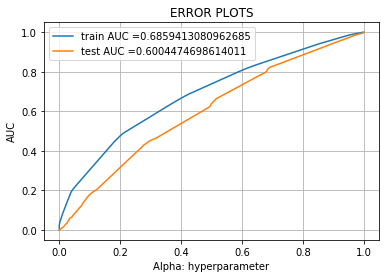

In [75]:
dt2=DecisionTreeClassifier(max_depth=10,min_samples_split=500,class_weight='balanced')
dt2.fit(X_tr2,y_train)
y_train_pred2=dt2.predict_proba(X_tr2)[:,1]
y_test_pred2=dt2.predict_proba(X_te2)[:,1]
train_fpr2, train_tpr2, tr_thresholds2 = roc_curve(y_train, y_train_pred2)
test_fpr2, test_tpr2, te_thresholds2 = roc_curve(y_test, y_test_pred2)

plt.plot(train_fpr2, train_tpr2, label="train AUC ="+str(auc(train_fpr2, train_tpr2)))
plt.plot(test_fpr2, test_tpr2, label="test AUC ="+str(auc(test_fpr2, test_tpr2)))
plt.legend()
plt.xlabel("Alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

the maximum value of tpr*(1-fpr) 0.24422104418040885 for threshold 0.429


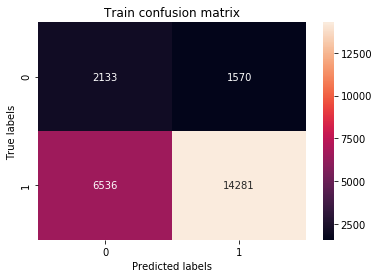

In [77]:
#https://gist.github.com/shaypal5/94c53d765083101efc0240d776a23823#file-confusion_matrix_pretty_print-py-L6
cm_tr2=confusion_matrix(y_train,predict(y_train_pred2,tr_thresholds2, train_fpr2, train_fpr2))
ax=plt.subplot()
sns.heatmap(cm_tr2,annot=True,ax=ax,fmt='g')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Train confusion matrix')
plt.show()

the maximum value of tpr*(1-fpr) 0.24999834788297723 for threshold 0.473


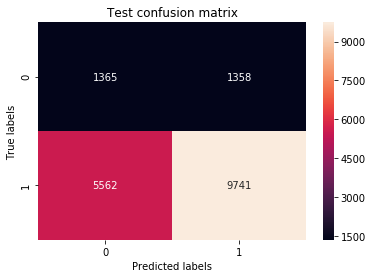

In [78]:
cm_te2=confusion_matrix(y_test,predict(y_test_pred2,te_thresholds2,test_fpr2,test_fpr2))
ax=plt.subplot()
sns.heatmap(cm_te2,annot=True,ax=ax,fmt='g')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Test confusion matrix')
plt.show()

In [40]:
from itertools import chain
tfidf_names=list(chain(feat_tfidf_ess,feat_tfidf_tit,fn_ss,fn_tp,fn_pgc,fn_cc,fn_csc,["price"]))

In [41]:
import graphviz 
from sklearn import tree
clf2=tree.DecisionTreeClassifier(max_depth=10,min_samples_split=500,class_weight='balanced')
clf2=clf2.fit(X_tr2,y_train)

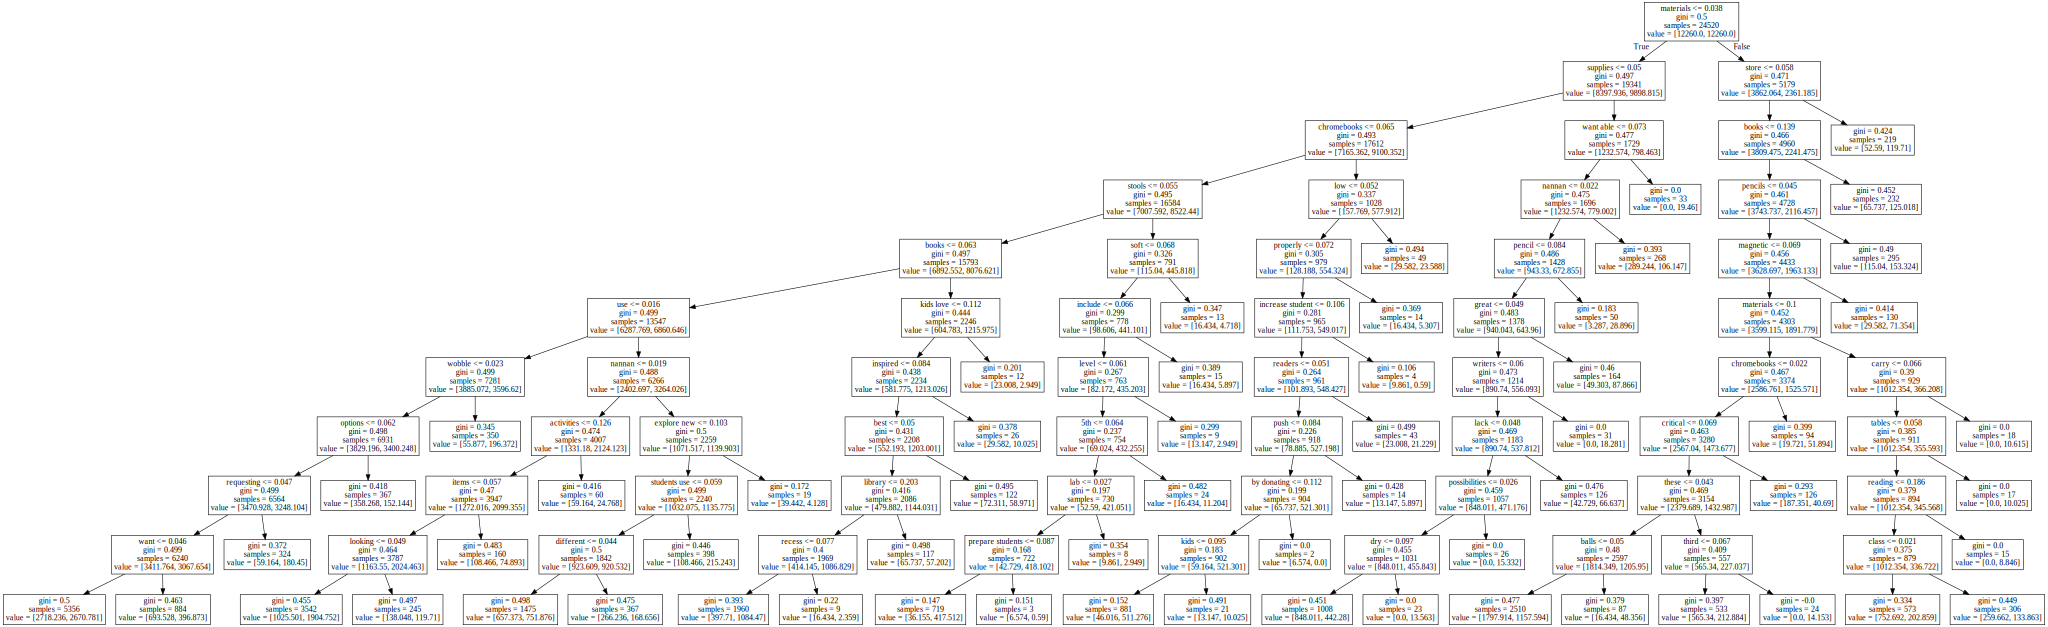

In [44]:
s2=tree.export_graphviz(clf2,feature_names=tfidf_names)
graph2=graphviz.Source(s2)
graph2.render("X_train")
graph2

In [83]:
t2 = tr_thresholds2[np.argmax(test_tpr2*(1-test_fpr2))]
fpd2=[]
for i in range(X_te2.shape[0]):
    if y_test[i]==0 and y_test_pred2[i]>=t2:
        fpd2.append(i)
X_trw2=X_test
X_trw2['index']=[x for x in range(len(X_test))]
X_trw2=X_trw2.set_index('index')
fpdw2=pd.DataFrame([X_trw2.iloc[x] for x in fpd2])
fpdw2.to_csv('fp2.csv')
df2=pd.read_csv(r"fp2.csv")

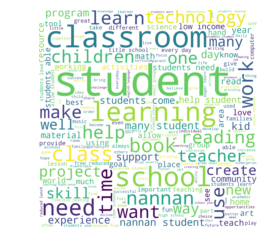

In [86]:
#https://www.datacamp.com/community/tutorials/wordcloud-python
text2 = " ".join(review for review in df2.essay)
# Generate a word cloud image
wordcloud = WordCloud(width=1500,height=1500,stopwords=stopwords, background_color="white").generate(text2)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

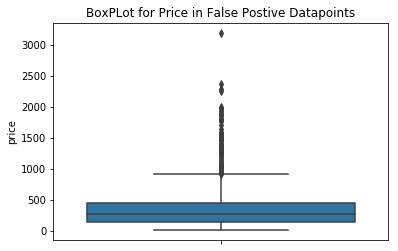

In [87]:
plt.title("BoxPLot for Price in False Postive Datapoints")
sns.boxplot(y='price', data=df2)
plt.show()

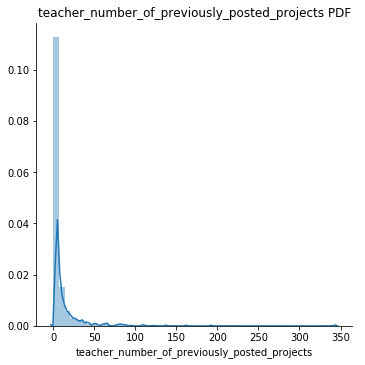

In [88]:
sns.FacetGrid(df2, height=5) \
   .map(sns.distplot, "teacher_number_of_previously_posted_projects") \
   .add_legend();
plt.title("teacher_number_of_previously_posted_projects PDF")
plt.show();

# SET-3

In [91]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [92]:
#https://github.com/sdimi/average-word2vec
def avgw2v(essay):
    avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
    for sentence in tqdm(essay): # for each review/sentence
        vector = np.zeros(300) # as word vectors are of zero length
        cnt_words =0; # num of words with a valid vector in the sentence/review
        for word in sentence.split(): # for each word in a review/sentence
            if word in glove_words:
                vector += model[word]
                cnt_words += 1
        if cnt_words != 0:
            vector /= cnt_words
        avg_w2v_vectors.append(vector)
    return avg_w2v_vectors


In [93]:
#https://github.com/sdimi/average-word2vec
def avgw2vtitle(title):
    avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
    for sentence in tqdm(title):# for each review/sentence
        vector = np.zeros(300) # as word vectors are of zero length
        cnt_words =0; # num of words with a valid vector in the sentence/review
        for word in sentence.split(): # for each word in a review/sentence
            if word in glove_words:
                vector += model[word]
                cnt_words += 1
        if cnt_words != 0:
            vector /= cnt_words
        avg_w2v_vectors.append(vector)
    return avg_w2v_vectors

In [95]:
train_essay_avgw2v=avgw2v(X_train['essay'].values)
print(len(train_essay_avgw2v))
cv_essay_avgw2v=avgw2v(X_cv['essay'].values)
print(len(cv_essay_avgw2v))
test_essay_avgw2v=avgw2v(X_test['essay'].values)
print(len(test_essay_avgw2v))

100%|██████████████████████████████████████████████████████████████████████████| 24520/24520 [00:06<00:00, 4039.53it/s]


24520


100%|██████████████████████████████████████████████████████████████████████████| 12078/12078 [00:03<00:00, 3827.72it/s]


12078


100%|██████████████████████████████████████████████████████████████████████████| 18026/18026 [00:05<00:00, 3250.55it/s]


18026


In [96]:
train_title_avgw2v=avgw2vtitle(X_train['project_title'].values)
print(len(train_title_avgw2v))
cv_title_avgw2v=avgw2vtitle(X_cv['project_title'].values)
print(len(cv_title_avgw2v))
test_title_avgw2v=avgw2vtitle(X_test['project_title'].values)
print(len(test_title_avgw2v))

100%|█████████████████████████████████████████████████████████████████████████| 24520/24520 [00:00<00:00, 62133.86it/s]


24520


100%|█████████████████████████████████████████████████████████████████████████| 12078/12078 [00:00<00:00, 60231.95it/s]


12078


100%|█████████████████████████████████████████████████████████████████████████| 18026/18026 [00:00<00:00, 64674.03it/s]


18026


In [97]:
X_tr3= hstack((train_essay_avgw2v,train_title_avgw2v,X_train_state_ohe, X_train_teacher_ohe, X_train_project_gradec,X_train_clean_cat,X_train_clean_subcat, X_train_price_norm)).tocsr()
X_cv3= hstack((cv_essay_avgw2v,cv_title_avgw2v,X_cv_state_ohe, X_cv_teacher_ohe, X_cv_project_gradec,X_cv_clean_cat,X_cv_clean_subcat,X_cv_price_norm)).tocsr()
X_te3= hstack((test_essay_avgw2v,test_title_avgw2v,X_test_state_ohe, X_test_teacher_ohe, X_test_project_gradec,X_test_clean_cat,X_test_clean_subcat,X_test_price_norm)).tocsr()

print("Final Data matrix")
print(X_tr3.shape, y_train.shape)
print(X_cv3.shape, y_cv.shape)
print(X_te3.shape, y_test.shape)
print("="*100)

Final Data matrix
(24520, 701) (24520,)
(12078, 701) (12078,)
(18026, 701) (18026,)


In [98]:
dt3=DecisionTreeClassifier(class_weight='balanced')
param={'max_depth':l,'min_samples_split':mss}
clf3= GridSearchCV(dt3,param, cv=3, scoring='roc_auc',n_jobs=2)
clf3.fit(X_tr3, y_train)

train_auc3= clf3.cv_results_['mean_train_score']
train_auc_std3= clf3.cv_results_['std_train_score']
cv_auc3= clf3.cv_results_['mean_test_score'] 
cv_auc_std3= clf3.cv_results_['std_test_score']

In [99]:
print(clf3.best_estimator_)
print(clf3.score(X_te3,y_test))

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=100,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
0.5895005597422938


In [101]:
dt3=DecisionTreeClassifier(min_samples_split=100,class_weight='balanced')
param={'max_depth':l}
clf3 = GridSearchCV(dt3, param, cv=3, scoring='roc_auc',n_jobs=2)
clf3.fit(X_tr3, y_train)

train_auc3= clf3.cv_results_['mean_train_score']
train_auc_std3= clf3.cv_results_['std_train_score']
cv_auc3= clf3.cv_results_['mean_test_score'] 
cv_auc_std3= clf3.cv_results_['std_test_score']

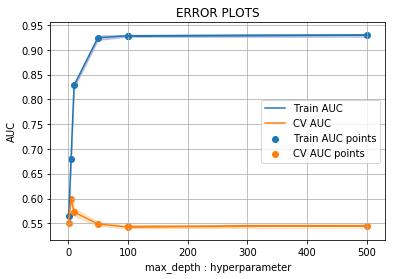

In [102]:
plt.plot(param['max_depth'], train_auc3, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(param['max_depth'],train_auc3 - train_auc_std3,train_auc3 + train_auc_std3,alpha=0.2,color='darkblue')

plt.plot(param['max_depth'], cv_auc3, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(param['max_depth'],cv_auc3 - cv_auc_std3,cv_auc3 + cv_auc_std3,alpha=0.2,color='darkorange')

plt.scatter(param['max_depth'], train_auc3, label='Train AUC points')
plt.scatter(param['max_depth'], cv_auc3, label='CV AUC points')


plt.legend()
plt.xlabel("max_depth : hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

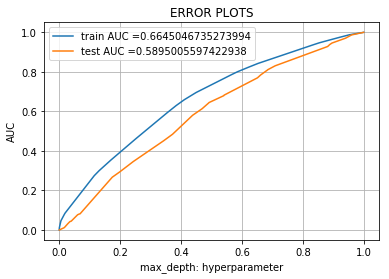

In [104]:
dt3=DecisionTreeClassifier(max_depth=5,min_samples_split=100,class_weight='balanced')
dt3.fit(X_tr3,y_train)
y_train_pred3=dt3.predict_proba(X_tr3)[:,1]
y_test_pred3=dt3.predict_proba(X_te3)[:,1]
train_fpr3, train_tpr3, tr_thresholds3 = roc_curve(y_train, y_train_pred3)
test_fpr3, test_tpr3, te_thresholds3 = roc_curve(y_test, y_test_pred3)

plt.plot(train_fpr3, train_tpr3, label="train AUC ="+str(auc(train_fpr3, train_tpr3)))
plt.plot(test_fpr3, test_tpr3, label="test AUC ="+str(auc(test_fpr3, test_tpr3)))
plt.legend()
plt.xlabel("max_depth: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

the maximum value of tpr*(1-fpr) 0.2475443599204184 for threshold 0.464


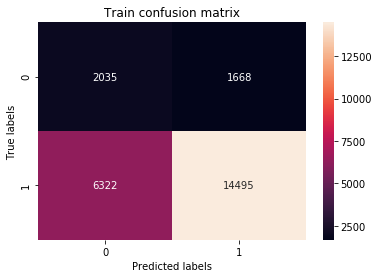

In [105]:
#https://gist.github.com/shaypal5/94c53d765083101efc0240d776a23823#file-confusion_matrix_pretty_print-py-L6
cm_tr3=confusion_matrix(y_train,predict(y_train_pred3,tr_thresholds3,train_fpr3, train_fpr3))
ax=plt.subplot()
sns.heatmap(cm_tr3,fmt='g',annot=True,ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Train confusion matrix')
plt.show()

the maximum value of tpr*(1-fpr) 0.24993172373528422 for threshold 0.516


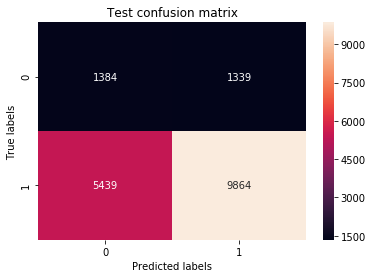

In [106]:
#https://gist.github.com/shaypal5/94c53d765083101efc0240d776a23823#file-confusion_matrix_pretty_print-py-L6
cm_te3=confusion_matrix(y_test,predict(y_test_pred3,te_thresholds3,test_fpr3, test_fpr3))
ax=plt.subplot()
sns.heatmap(cm_te3,fmt='g',annot=True,ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Test confusion matrix')
plt.show()

In [107]:
t3 = tr_thresholds3[np.argmax(test_tpr3*(1-test_fpr3))]
fpd3=[]
for i in range(X_te3.shape[0]):
    if y_test[i]==0 and y_test_pred3[i]>=t3:
        fpd3.append(i)
X_trw3=X_test
X_trw3['index']=[x for x in range(len(X_test))]
X_trw3=X_trw3.set_index('index')
fpdw3=pd.DataFrame([X_trw3.iloc[x] for x in fpd3])
fpdw3.to_csv('fp3.csv')
df3=pd.read_csv(r"fp3.csv")

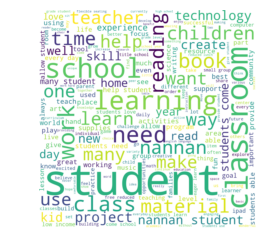

In [108]:
#https://www.datacamp.com/community/tutorials/wordcloud-python
text3 = " ".join(review for review in df3.essay)
# Generate a word cloud image
wordcloud3 = WordCloud(width=1500,height=1500,stopwords=stopwords, background_color="white").generate(text3)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis("off")
plt.show()

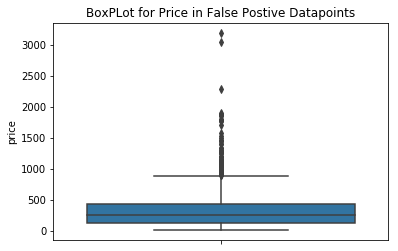

In [109]:
plt.title("BoxPLot for Price in False Postive Datapoints")
sns.boxplot(y='price', data=df3)
plt.show()

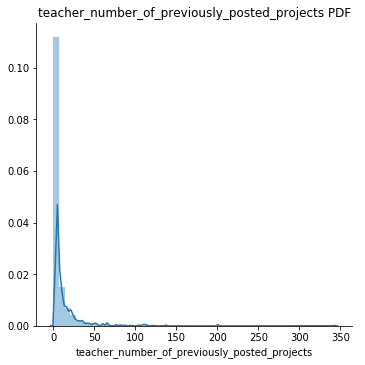

In [110]:
sns.FacetGrid(df3, height=5) \
   .map(sns.distplot, "teacher_number_of_previously_posted_projects") \
   .add_legend();
plt.title("teacher_number_of_previously_posted_projects PDF")
plt.show();

# SET-4

In [111]:
# Please write all the code with proper documentation
tfidf_model=TfidfVectorizer(min_df=10,max_features=5000,ngram_range=(1,2))
tfidf_model.fit(X_train['essay'])
dictionary=dict(zip(tfidf_model.get_feature_names(),list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())


In [112]:
def tfidfw2v(essay):
    tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
    for sentence in tqdm(essay): # for each review/sentence
        vector = np.zeros(300) # as word vectors are of zero length
        tf_idf_weight =0; # num of words with a valid vector in the sentence/review
        for word in sentence.split(): # for each word in a review/sentence
            if (word in glove_words) and (word in tfidf_words):
                vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
                tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
                vector += (vec * tf_idf) # calculating tfidf weighted w2v
                tf_idf_weight += tf_idf
        if tf_idf_weight != 0:
            vector /= tf_idf_weight
        tfidf_w2v_vectors.append(vector)
    return tfidf_w2v_vectors
    

In [113]:
train_essay_tfidfw2v=tfidfw2v(X_train['essay'].values)
print(len(train_essay_tfidfw2v))
cv_essay_tfidfw2v=tfidfw2v(X_cv['essay'].values)
print(len(cv_essay_tfidfw2v))
test_essay_tfidfw2v=tfidfw2v(X_test['essay'].values)
print(len(test_essay_tfidfw2v))

100%|███████████████████████████████████████████████████████████████████████████| 24520/24520 [00:44<00:00, 552.06it/s]


24520


100%|███████████████████████████████████████████████████████████████████████████| 12078/12078 [00:24<00:00, 500.07it/s]


12078


100%|███████████████████████████████████████████████████████████████████████████| 18026/18026 [00:30<00:00, 594.80it/s]


18026


In [114]:
tfidf_model=TfidfVectorizer(min_df=10,max_features=5000,ngram_range=(1,2))
tfidf_model.fit(X_train['project_title'])
dictionary=dict(zip(tfidf_model.get_feature_names(),list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [115]:
train_title_tfidfw2v=tfidfw2v(X_train['project_title'].values)
print(len(train_title_tfidfw2v))
cv_title_tfidfw2v=tfidfw2v(X_cv['project_title'].values)
print(len(cv_title_tfidfw2v))
test_title_tfidfw2v=tfidfw2v(X_test['project_title'].values)
print(len(test_title_tfidfw2v))

100%|█████████████████████████████████████████████████████████████████████████| 24520/24520 [00:00<00:00, 43012.33it/s]


24520


100%|█████████████████████████████████████████████████████████████████████████| 12078/12078 [00:00<00:00, 42364.16it/s]


12078


100%|█████████████████████████████████████████████████████████████████████████| 18026/18026 [00:00<00:00, 43253.58it/s]


18026


In [116]:
X_tr4= hstack((train_essay_tfidfw2v,train_title_tfidfw2v,X_train_state_ohe, X_train_teacher_ohe, X_train_project_gradec,X_train_clean_cat,X_train_clean_subcat, X_train_price_norm)).tocsr()
X_cv4= hstack((cv_essay_tfidfw2v,cv_title_tfidfw2v,X_cv_state_ohe, X_cv_teacher_ohe, X_cv_project_gradec,X_cv_clean_cat,X_cv_clean_subcat,X_cv_price_norm)).tocsr()
X_te4= hstack((test_essay_tfidfw2v,test_title_tfidfw2v,X_test_state_ohe, X_test_teacher_ohe, X_test_project_gradec,X_test_clean_cat,X_test_clean_subcat,X_test_price_norm)).tocsr()

print("Final Data matrix")
print(X_tr4.shape, y_train.shape)
print(X_cv4.shape, y_cv.shape)
print(X_te4.shape, y_test.shape)
print("="*100)

Final Data matrix
(24520, 701) (24520,)
(12078, 701) (12078,)
(18026, 701) (18026,)


In [117]:
dt4=DecisionTreeClassifier(class_weight='balanced')
param={'max_depth':l,'min_samples_split':mss}
clf4= GridSearchCV(dt4,param, cv=3, scoring='roc_auc',n_jobs=2)
clf4.fit(X_tr4, y_train)

train_auc4= clf4.cv_results_['mean_train_score']
train_auc_std4= clf4.cv_results_['std_train_score']
cv_auc4= clf4.cv_results_['mean_test_score'] 
cv_auc_std4= clf4.cv_results_['std_test_score']

In [118]:
print(clf4.best_estimator_)
print(clf4.score(X_te4,y_test))

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=500,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
0.6067265571362505


In [119]:
dt4=DecisionTreeClassifier(min_samples_split=500,class_weight='balanced')
param={'max_depth':l}
clf4= GridSearchCV(dt4,param, cv=3, scoring='roc_auc',n_jobs=2)
clf4.fit(X_tr4, y_train)

train_auc4= clf4.cv_results_['mean_train_score']
train_auc_std4= clf4.cv_results_['std_train_score']
cv_auc4= clf4.cv_results_['mean_test_score'] 
cv_auc_std4= clf4.cv_results_['std_test_score']

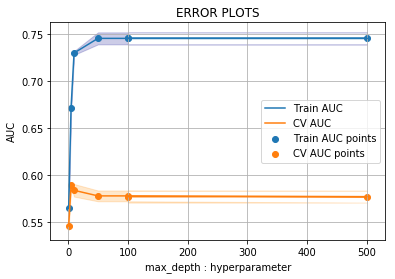

In [120]:
plt.plot(param['max_depth'], train_auc4, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(param['max_depth'],train_auc4 - train_auc_std4,train_auc4 + train_auc_std4,alpha=0.2,color='darkblue')

plt.plot(param['max_depth'], cv_auc4, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(param['max_depth'],cv_auc4 - cv_auc_std4,cv_auc4 + cv_auc_std4,alpha=0.2,color='darkorange')

plt.scatter(param['max_depth'], train_auc4, label='Train AUC points')
plt.scatter(param['max_depth'], cv_auc4, label='CV AUC points')


plt.legend()
plt.xlabel("max_depth : hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

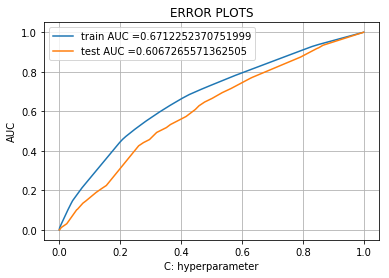

In [121]:
dt4=DecisionTreeClassifier(max_depth=5,min_samples_split=500,class_weight='balanced')
dt4.fit(X_tr4,y_train)
y_train_pred4=dt4.predict_proba(X_tr4)[:,1]
y_test_pred4=dt4.predict_proba(X_te4)[:,1]
train_fpr4, train_tpr4, tr_thresholds4 = roc_curve(y_train, y_train_pred4)
test_fpr4, test_tpr4, te_thresholds4= roc_curve(y_test, y_test_pred4)

plt.plot(train_fpr4, train_tpr4, label="train AUC ="+str(auc(train_fpr4, train_tpr4)))
plt.plot(test_fpr4, test_tpr4, label="test AUC ="+str(auc(test_fpr4, test_tpr4)))
plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

the maximum value of tpr*(1-fpr) 0.249977665888844 for threshold 0.391


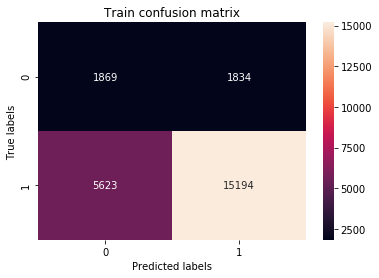

In [122]:
#https://gist.github.com/shaypal5/94c53d765083101efc0240d776a23823#file-confusion_matrix_pretty_print-py-L6
cm_tr4=confusion_matrix(y_train,predict(y_train_pred4,tr_thresholds4,train_fpr4, train_fpr4))
ax=plt.subplot()
sns.heatmap(cm_tr4,fmt='g',annot=True,ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Train confusion matrix')
plt.show()

the maximum value of tpr*(1-fpr) 0.2499943018821052 for threshold 0.449


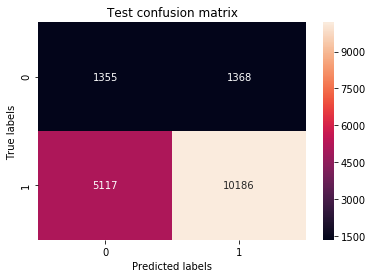

In [123]:
#https://gist.github.com/shaypal5/94c53d765083101efc0240d776a23823#file-confusion_matrix_pretty_print-py-L6
cm_te4=confusion_matrix(y_test,predict(y_test_pred4,te_thresholds4,test_fpr4, test_fpr4))
ax=plt.subplot()
sns.heatmap(cm_te4,fmt='g',annot=True,ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Test confusion matrix')
plt.show()

In [124]:
t4= tr_thresholds4[np.argmax(test_tpr4*(1-test_fpr4))]
fpd4=[]
for i in range(X_te4.shape[0]):
    if y_test[i]==0 and y_test_pred4[i]>=t4:
        fpd4.append(i)
X_trw4=X_test
X_trw4['index']=[x for x in range(len(X_test))]
X_trw4=X_trw4.set_index('index')
fpdw4=pd.DataFrame([X_trw4.iloc[x] for x in fpd4])
fpdw4.to_csv('fp4.csv')
df4=pd.read_csv(r"fp4.csv")

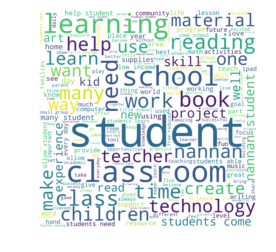

In [125]:
#https://www.datacamp.com/community/tutorials/wordcloud-python
text4 = " ".join(review for review in df4.essay)
# Generate a word cloud image
wordcloud4= WordCloud(width=1500,height=1500,stopwords=stopwords, background_color="white").generate(text4)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud4, interpolation='bilinear')
plt.axis("off")
plt.show()

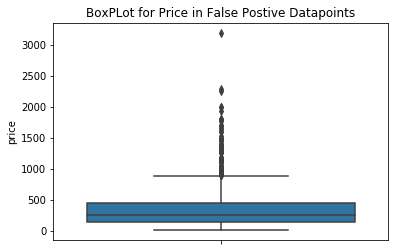

In [126]:
plt.title("BoxPLot for Price in False Postive Datapoints")
sns.boxplot(y='price', data=df4)
plt.show()

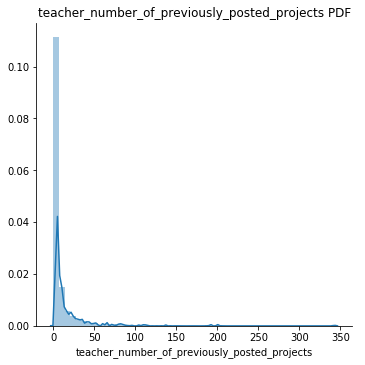

In [127]:
sns.FacetGrid(df4, height=5) \
   .map(sns.distplot, "teacher_number_of_previously_posted_projects") \
   .add_legend();
plt.title("teacher_number_of_previously_posted_projects PDF")
plt.show();

<h2>2.3 Make Data Model Ready: encoding eassay, and project_title</h2>

In [46]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

<h2>2.4 Appling  Decision Tree on different kind of featurization as mentioned in the instructions</h2>

<br>Apply  Decision Tree on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

In [47]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

### 2.4.1 Applying Decision Trees on BOW,<font color='red'> SET 1</font>

In [48]:
# Please write all the code with proper documentation

#### 2.4.1.1 Graphviz visualization of Decision Tree on BOW,<font color='red'> SET 1</font>

In [49]:
# Please write all the code with proper documentation

### 2.4.2 Applying Decision Trees on TFIDF,<font color='red'> SET 2</font>

In [50]:
# Please write all the code with proper documentation

#### 2.4.2.1 Graphviz visualization of Decision Tree on TFIDF,<font color='red'> SET 2</font>

In [51]:
# Please write all the code with proper documentation

### 2.4.3 Applying Decision Trees on AVG W2V,<font color='red'> SET 3</font>

In [52]:
# Please write all the code with proper documentation

### 2.4.4 Applying Decision Trees on TFIDF W2V,<font color='red'> SET 4</font>

In [53]:
# Please write all the code with proper documentation

<h2>2.5 [Task-2]Getting top 5k features using `feature_importances_`</h2>

In [128]:
dt2=DecisionTreeClassifier(max_depth=10,min_samples_split=500,class_weight='balanced')
dt2.fit(X_tr2,y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=10, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=500,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [138]:
dtfeat=dt2.feature_importances_
dtfeat.shape

(6923,)

In [152]:
ll=X_tr2.todense()
ll

matrix([[0., 0., 0., ..., 0., 1., 1.],
        [0., 0., 0., ..., 0., 1., 1.],
        [0., 0., 0., ..., 1., 0., 1.],
        ...,
        [0., 0., 0., ..., 0., 1., 1.],
        [0., 0., 0., ..., 0., 1., 1.],
        [0., 0., 0., ..., 0., 0., 1.]])

In [155]:
datafeat=pd.DataFrame(ll,columns=tfidf_names)

In [157]:
dtf=DecisionTreeClassifier(max_depth=10,min_samples_split=500,class_weight='balanced')
dtf.fit(datafeat,y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=10, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=500,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [243]:
features=pd.Series(dtf.feature_importances_,tfidf_names).sort_values(ascending=False)

In [244]:
bestfeat=dtf.feature_importances_[:5000]

In [251]:
bestfeat=features[0:5000]
bf=bestfeat.keys()

Index(['materials', 'supplies', 'books', 'use', 'wobble', 'chromebooks',
       'headphones', 'markers', 'give', 'stools',
       ...
       'seating classroom', 'seating flexible', 'seating kindergarten',
       'seating learning', 'seating options', 'seating paradise',
       'seating student', 'seating success', 'seats', 'second'],
      dtype='object', length=5000)

In [182]:
def selectkimp(model,X,k=5000):
    return X[:,model.feature_importances_.argsort()[::-1][:k]]

In [185]:
newx=selectkimp(dt2,X_tr2,5000)
newx.shape

(24520, 5000)

In [199]:
newtest=selectkimp(dt2,X_te2,5000)
newtest.shape

(18026, 5000)

In [187]:
l=[10**-4,10**-3,10**-2,10**-1,1,10,100,1000,10000]

In [193]:
from sklearn.linear_model import LogisticRegression
lr5=LogisticRegression(penalty='l2')
param={'C':l}
clf = GridSearchCV(lr5, param, cv=3, scoring='roc_auc',n_jobs=2)
clf.fit(newx, y_train)

train_auc5= clf.cv_results_['mean_train_score']
train_auc_std5= clf.cv_results_['std_train_score']
cv_auc5= clf.cv_results_['mean_test_score'] 
cv_auc_std5= clf.cv_results_['std_test_score']
print(clf.best_estimator_)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


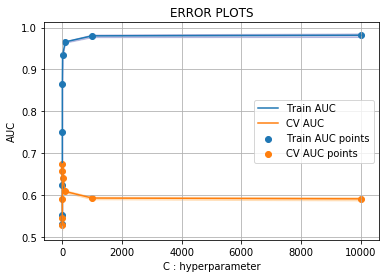

In [195]:
plt.plot(param['C'], train_auc5, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(param['C'],train_auc5 - train_auc_std5,train_auc5 + train_auc_std5,alpha=0.2,color='darkblue')

plt.plot(param['C'], cv_auc5, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(param['C'],cv_auc5 - cv_auc_std5,cv_auc5 + cv_auc_std5,alpha=0.2,color='darkorange')

plt.scatter(param['C'], train_auc5, label='Train AUC points')
plt.scatter(param['C'], cv_auc5, label='CV AUC points')


plt.legend()
plt.xlabel("C : hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

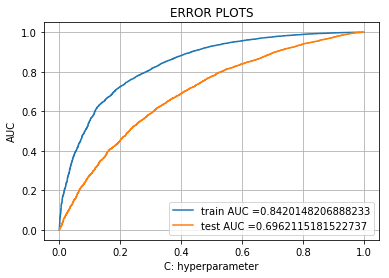

In [200]:
lr=LogisticRegression(C=1)
lr.fit(newx,y_train)
y_train_pred5=lr.predict_proba(newx)[:,1]
y_test_pred5=lr.predict_proba(newtest)[:,1]
train_fpr5, train_tpr5, tr_thresholds5 = roc_curve(y_train, y_train_pred5)
test_fpr5, test_tpr5, te_thresholds5= roc_curve(y_test, y_test_pred5)

plt.plot(train_fpr5, train_tpr5, label="train AUC ="+str(auc(train_fpr5, train_tpr5)))
plt.plot(test_fpr5, test_tpr5, label="test AUC ="+str(auc(test_fpr5, test_tpr5)))
plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [203]:
clf5=tree.DecisionTreeClassifier(max_depth=10,min_samples_split=500,class_weight='balanced')
clf5=clf5.fit(newx,y_train)

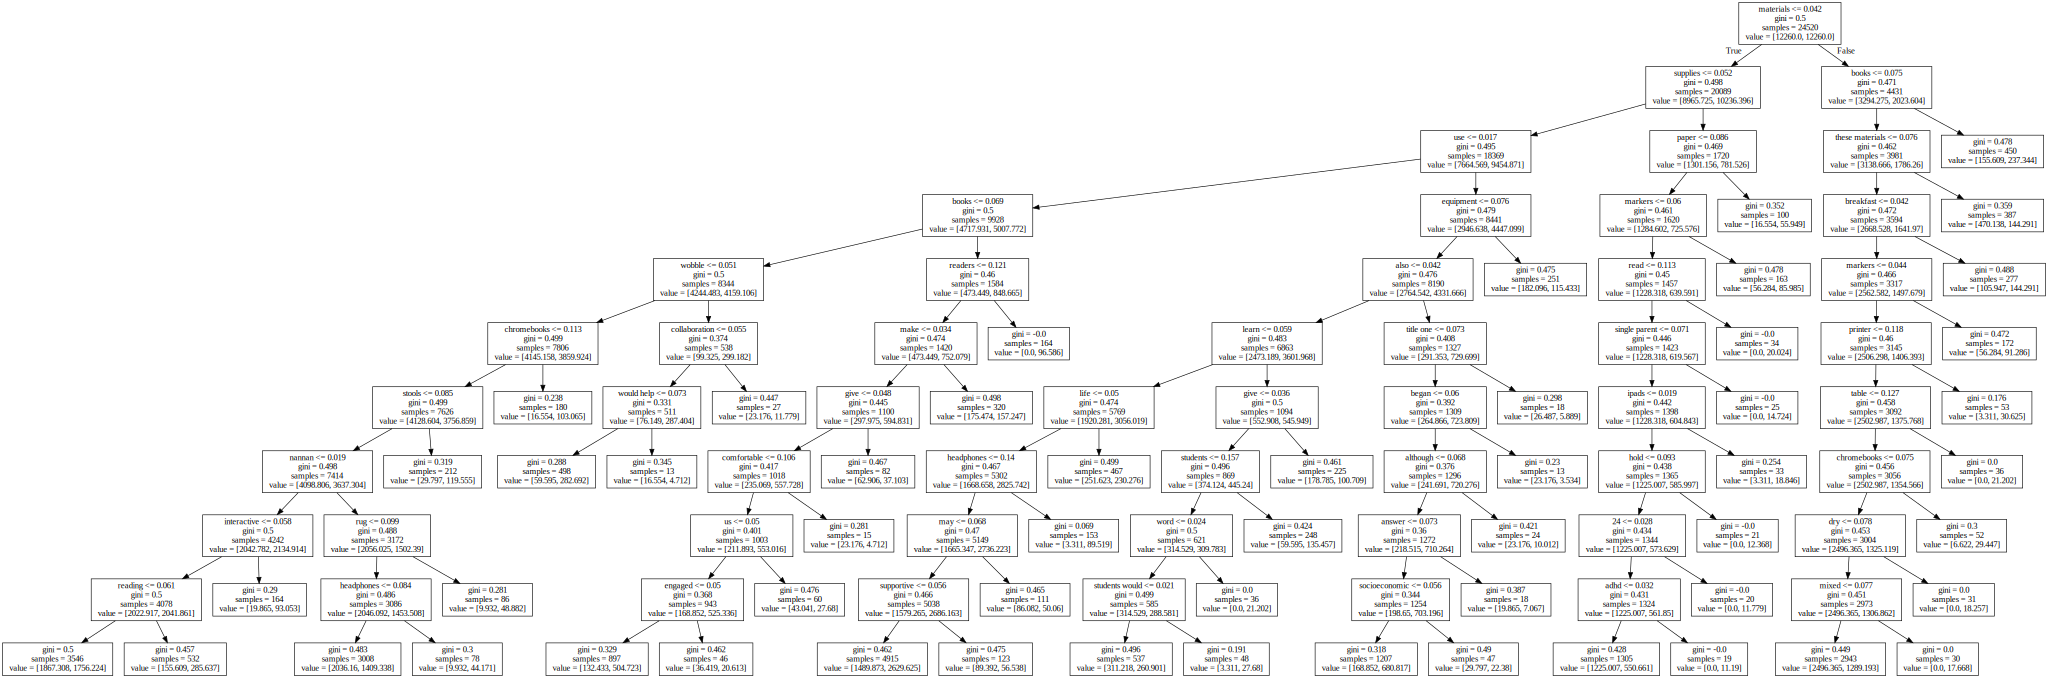

In [252]:
s5=tree.export_graphviz(clf5,feature_names=bf)
graph5=graphviz.Source(s5)
graph5.render("X_train")
graph5

the maximum value of tpr*(1-fpr) 0.24999998176807253 for threshold 0.732


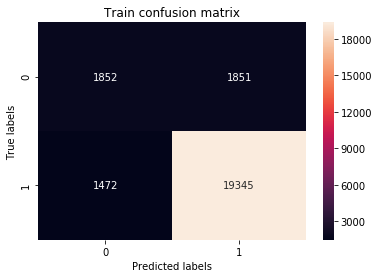

In [253]:
#https://gist.github.com/shaypal5/94c53d765083101efc0240d776a23823#file-confusion_matrix_pretty_print-py-L6
cm_tr5=confusion_matrix(y_train,predict(y_train_pred5,tr_thresholds5,train_fpr5, train_fpr5))
ax=plt.subplot()
sns.heatmap(cm_tr5,fmt='g',annot=True,ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Train confusion matrix')
plt.show()

the maximum value of tpr*(1-fpr) 0.24999996628332607 for threshold 0.805


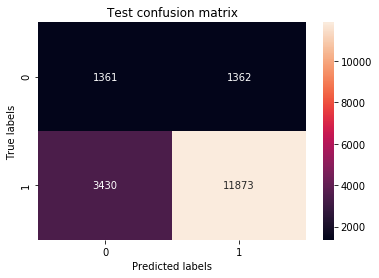

In [254]:
#https://gist.github.com/shaypal5/94c53d765083101efc0240d776a23823#file-confusion_matrix_pretty_print-py-L6
cm_te5=confusion_matrix(y_test,predict(y_test_pred5,te_thresholds5,test_fpr5, test_fpr5))
ax=plt.subplot()
sns.heatmap(cm_te5,fmt='g',annot=True,ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Test confusion matrix')
plt.show()

<h1>3. Conclusion</h1>

In [260]:
# Please compare all your models using Prettytable library
#Here Hyperparameter 1:Max Depth and Hyperparameter 2:Min_Samples_Split
#In SET-5,the hyperparameter 1 is C as in Logistic Regression
from prettytable import PrettyTable
x=PrettyTable()
x.field_names=["Vectorizer","Model","Hyper Parameter 1","Hyper Parameter 2","AUC"]
x.add_row(["Bow","GridSearchCV",10,500,str(auc(train_fpr, train_tpr))])
x.add_row(["Tfidf","GridSearchCV",10,500,str(auc(train_fpr2, train_tpr2))])
x.add_row(["Avgw2v","GridSearchCV",5,100,str(auc(train_fpr3, train_tpr3))])
x.add_row(["TfidfAvgw2v","GridSearchCV",5,500,str(auc(train_fpr4, train_tpr4))])
x.add_row(["Best 5k features","Logistic Regression+GridSearchCV",1,0,str(auc(train_fpr5, train_tpr5))])

In [261]:
print(x)

+------------------+----------------------------------+-------------------+-------------------+--------------------+
|    Vectorizer    |              Model               | Hyper Parameter 1 | Hyper Parameter 2 |        AUC         |
+------------------+----------------------------------+-------------------+-------------------+--------------------+
|       Bow        |           GridSearchCV           |         10        |        500        | 0.6766498959128825 |
|      Tfidf       |           GridSearchCV           |         10        |        500        | 0.6859413080962685 |
|      Avgw2v      |           GridSearchCV           |         5         |        100        | 0.6645046735273994 |
|   TfidfAvgw2v    |           GridSearchCV           |         5         |        500        | 0.6712252370751999 |
| Best 5k features | Logistic Regression+GridSearchCV |         1         |         0         | 0.8420148206888233 |
+------------------+----------------------------------+---------